In [1]:
!pip install kaggle

In [2]:
import os



userkaggle       = 'xxxx'
passkaggle       = 'yyyyyyy'

try :
    os.environ['KAGGLE_USERNAME'] = userkaggle
    os.environ['KAGGLE_KEY'] = passkaggle
except :
    print("KAGGLE_USERNAME or KAGGLE_KEY is not set.")
   

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import numpy as np
import matplotlib.pyplot as plt
import torchvision.utils 

In [2]:
import os
from IPython.display import clear_output

if not os.path.exists('animal-faces.zip'):
    # Download the dataset
    !kaggle datasets download -d andrewmvd/animal-faces    

if os.path.exists('animal-faces.zip') and not os.path.exists('animal-faces'):
    # Make directory and unzip
    !unzip animal-faces.zip -d animal-faces
    clear_output()


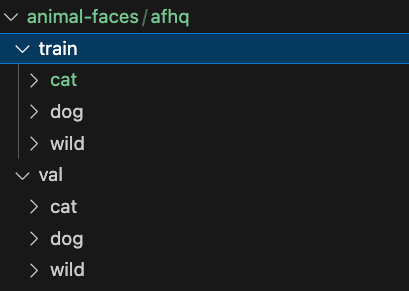

In [6]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the path to the directory containing the images
path = './animal-faces'

# Get a list of all image files with the .jpg extension
image_files = []
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith('.jpg'):
            image_files.append(os.path.join(root, file))

print('Number of images found:', len(image_files))

Number of images found: 16130


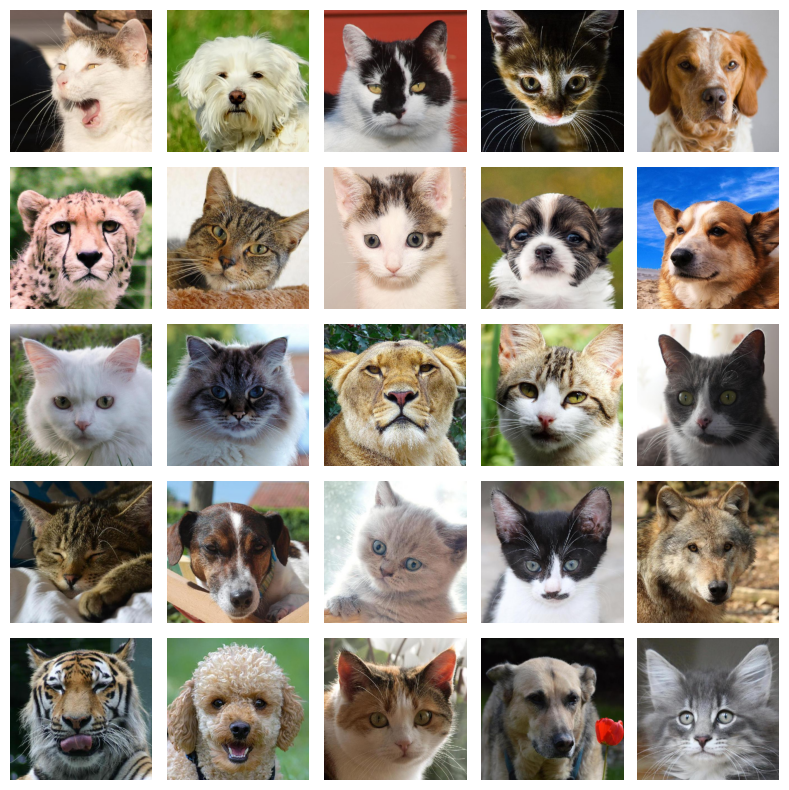

In [9]:
import random
# Randomly sample 8x8 images
sample_images = random.sample(image_files, 25)

# Display the sample grid image with 8x8 layout
fig, axs = plt.subplots(5, 5, figsize=(8, 8))
for i, ax in enumerate(axs.flatten()):
    img = mpimg.imread(sample_images[i])
    ax.imshow(img)
    ax.axis('off')

plt.tight_layout()
plt.show()

# Dataloaders without transforms

In [36]:


train_path = 'animal-faces/afhq/train'

dataset    = ImageFolder(root=train_path , transform=transforms.ToTensor())
dataloader = DataLoader(dataset, batch_size=20, shuffle=True , num_workers=1)

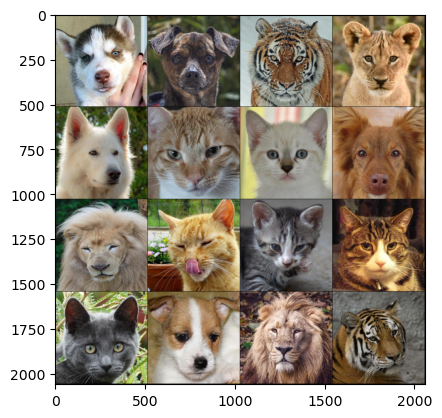

In [37]:
# %%
def imshow(image_torch): 
    # flip image channels to RGB
    image_torch = image_torch.numpy().transpose((1, 2, 0)) 
    plt.figure() 
    plt.imshow(image_torch) 
 
X_train, y_train = next(iter(dataloader)) 
image_grid = torchvision.utils.make_grid(X_train[:16, :, :, :], scale_each= True, nrow=4) 
imshow(image_grid) 

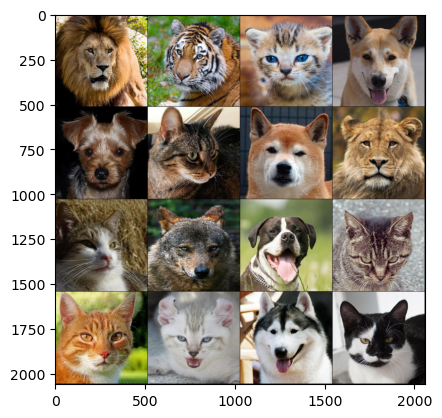

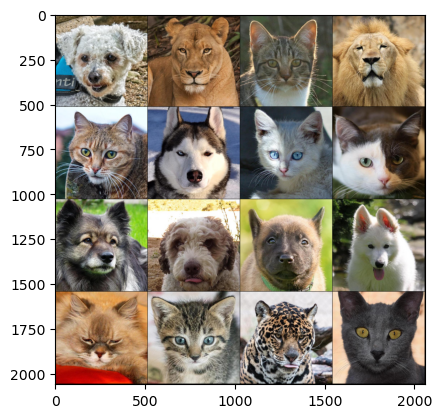

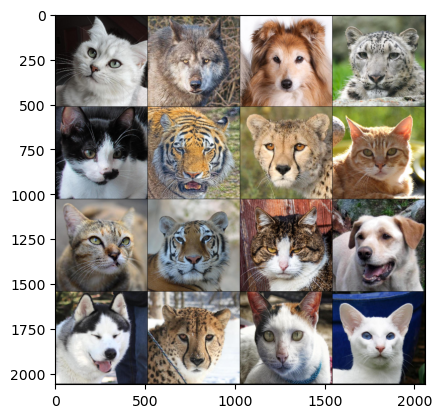

In [38]:
for i in range(3):  
    X_train, y_train = next(iter(dataloader)) 
    image_grid = torchvision.utils.make_grid(X_train[:16, :, :, :], scale_each= True, nrow=4) 
    imshow(image_grid) 
    

# Dataloaders with transforms

In [39]:

# %% compose a series of steps
preprocess_steps = transforms.Compose([
    transforms.Resize(300),  # better (300, 300)
    transforms.RandomRotation(50),
    transforms.CenterCrop(500),
    transforms.Grayscale(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
   
])



train_path = 'animal-faces/afhq/train'

dataset    = ImageFolder(root=train_path , transform=preprocess_steps)
dataloader = DataLoader(dataset, batch_size=20, shuffle=True , num_workers=1)

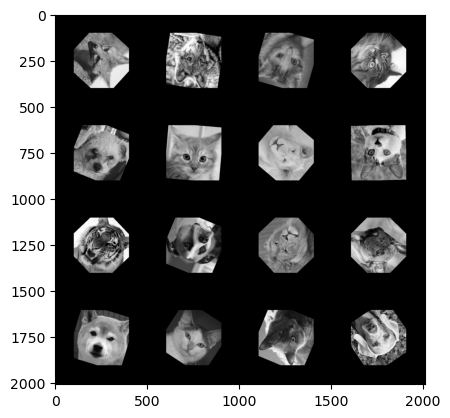

In [40]:
# %%
def imshow(image_torch): 
    # flip image channels to RGB
    image_torch = image_torch.numpy().transpose((1, 2, 0)) 
    plt.figure() 
    plt.imshow(image_torch) 
 
X_train, y_train = next(iter(dataloader)) 
image_grid = torchvision.utils.make_grid(X_train[:16, :, :, :], scale_each= True, nrow=4) 
imshow(image_grid) 

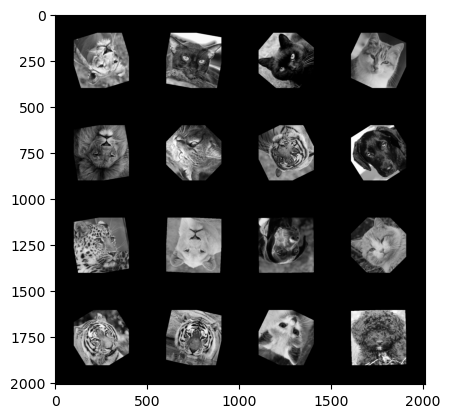

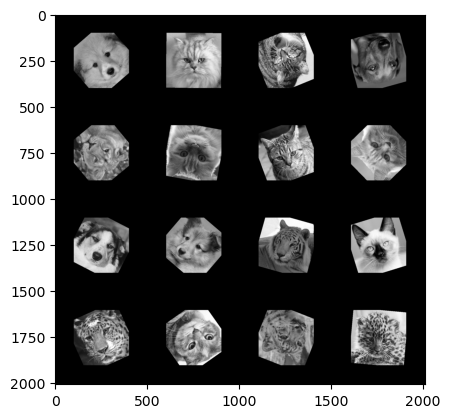

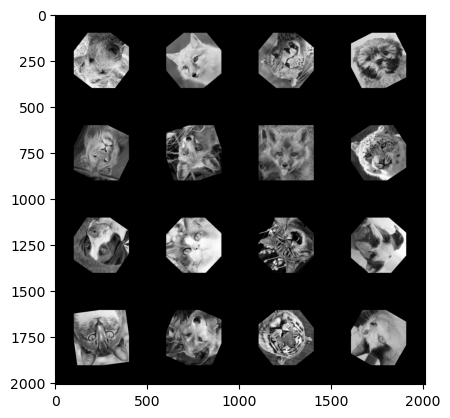

In [41]:
for i in range(3):  
    X_train, y_train = next(iter(dataloader)) 
    image_grid = torchvision.utils.make_grid(X_train[:16, :, :, :], scale_each= True, nrow=4) 
    imshow(image_grid) 
    